## A Comparative Analysis of SVM and Decision Tree Classifiers and Random Forests Machine Learning Models for Breast Cancer Prediction

The aim of this project is to have a good understanding of SVM and Tree based Machine learning models, apply the models in prediction and conduct a comparative analysis of the Model . This project will focus on a classification problem. The models will be applied to predict Breast Cancer.

The Comparison Analysis of this project will be based on feature importance and performance level of each model

In [2]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
!pip install imblearn
from imblearn import over_sampling

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Reading  the brest Cancer data

df=pd.read_csv('breast-cancer-wisconsin.data', header=None)


#Specifying Column Names Based on Provided Information in the documentation
column_name = ["id_number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", 
     "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli",
     "Mitoses", "Class"]

# Assigning column names to the dataframe
df.columns = column_name  

## Understanding the properties of the dataset

In [4]:
# Checking the feature variables
df.head()

,id_number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
# Understanding the data in use
df.info() 
# from the info properties, Our dataset consist of 9 features and 699 rows and there are all numeric values except the  Bare Nuclei features 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id_number                    699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
# Coverting the Bland Chromatin to numeric

df['Bare Nuclei']= df['Bare Nuclei'].str.strip().replace('?', ).astype('float')
df['Bare Nuclei']

0       1.0
1      10.0
2       2.0
3       4.0
4       1.0
       ... 
694     2.0
695     1.0
696     3.0
697     4.0
698     5.0
Name: Bare Nuclei, Length: 699, dtype: float64

In [7]:
# dropping the id_number column as its not needed 
df.drop('id_number', axis=1, inplace=True)

In [8]:
# Checking the number of missing values
print(df.isna().sum()) # We have no missing values in our data

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


### EDA Analysis:
Before I delve into the machine learning section of this project. I will be performing exploratory data analysis on the data to obtain valuable insights about the data on how to prepare and process the data to fit the suitablity of each model and obtain optimal model performance

In [9]:
# understanding descriptive statictics of the data
df.describe() 
# the data seems to be normalized and are within the same scale

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.529328,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.635260,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


2    65.522175
4    34.477825
Name: Class, dtype: float64


Text(0.5, 1.0, 'Target Class Distribution')

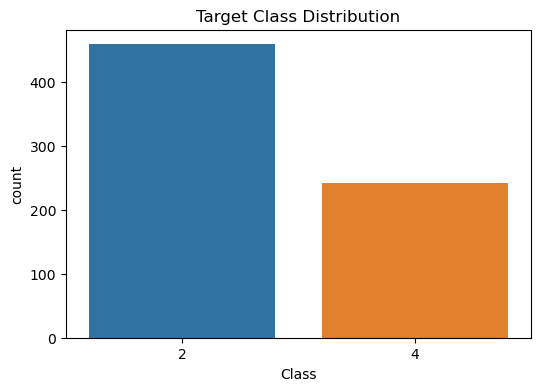

In [10]:
# Checking the distribution of the target variable
print(df['Class'].value_counts(normalize=True) *100)

# Visulaizing the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df) # Clearly we are dealing with an imnbalnce dataset. We have Malignant cases(4) as 35% of the data and Benign as 65% approximately
plt.title('Target Class Distribution')

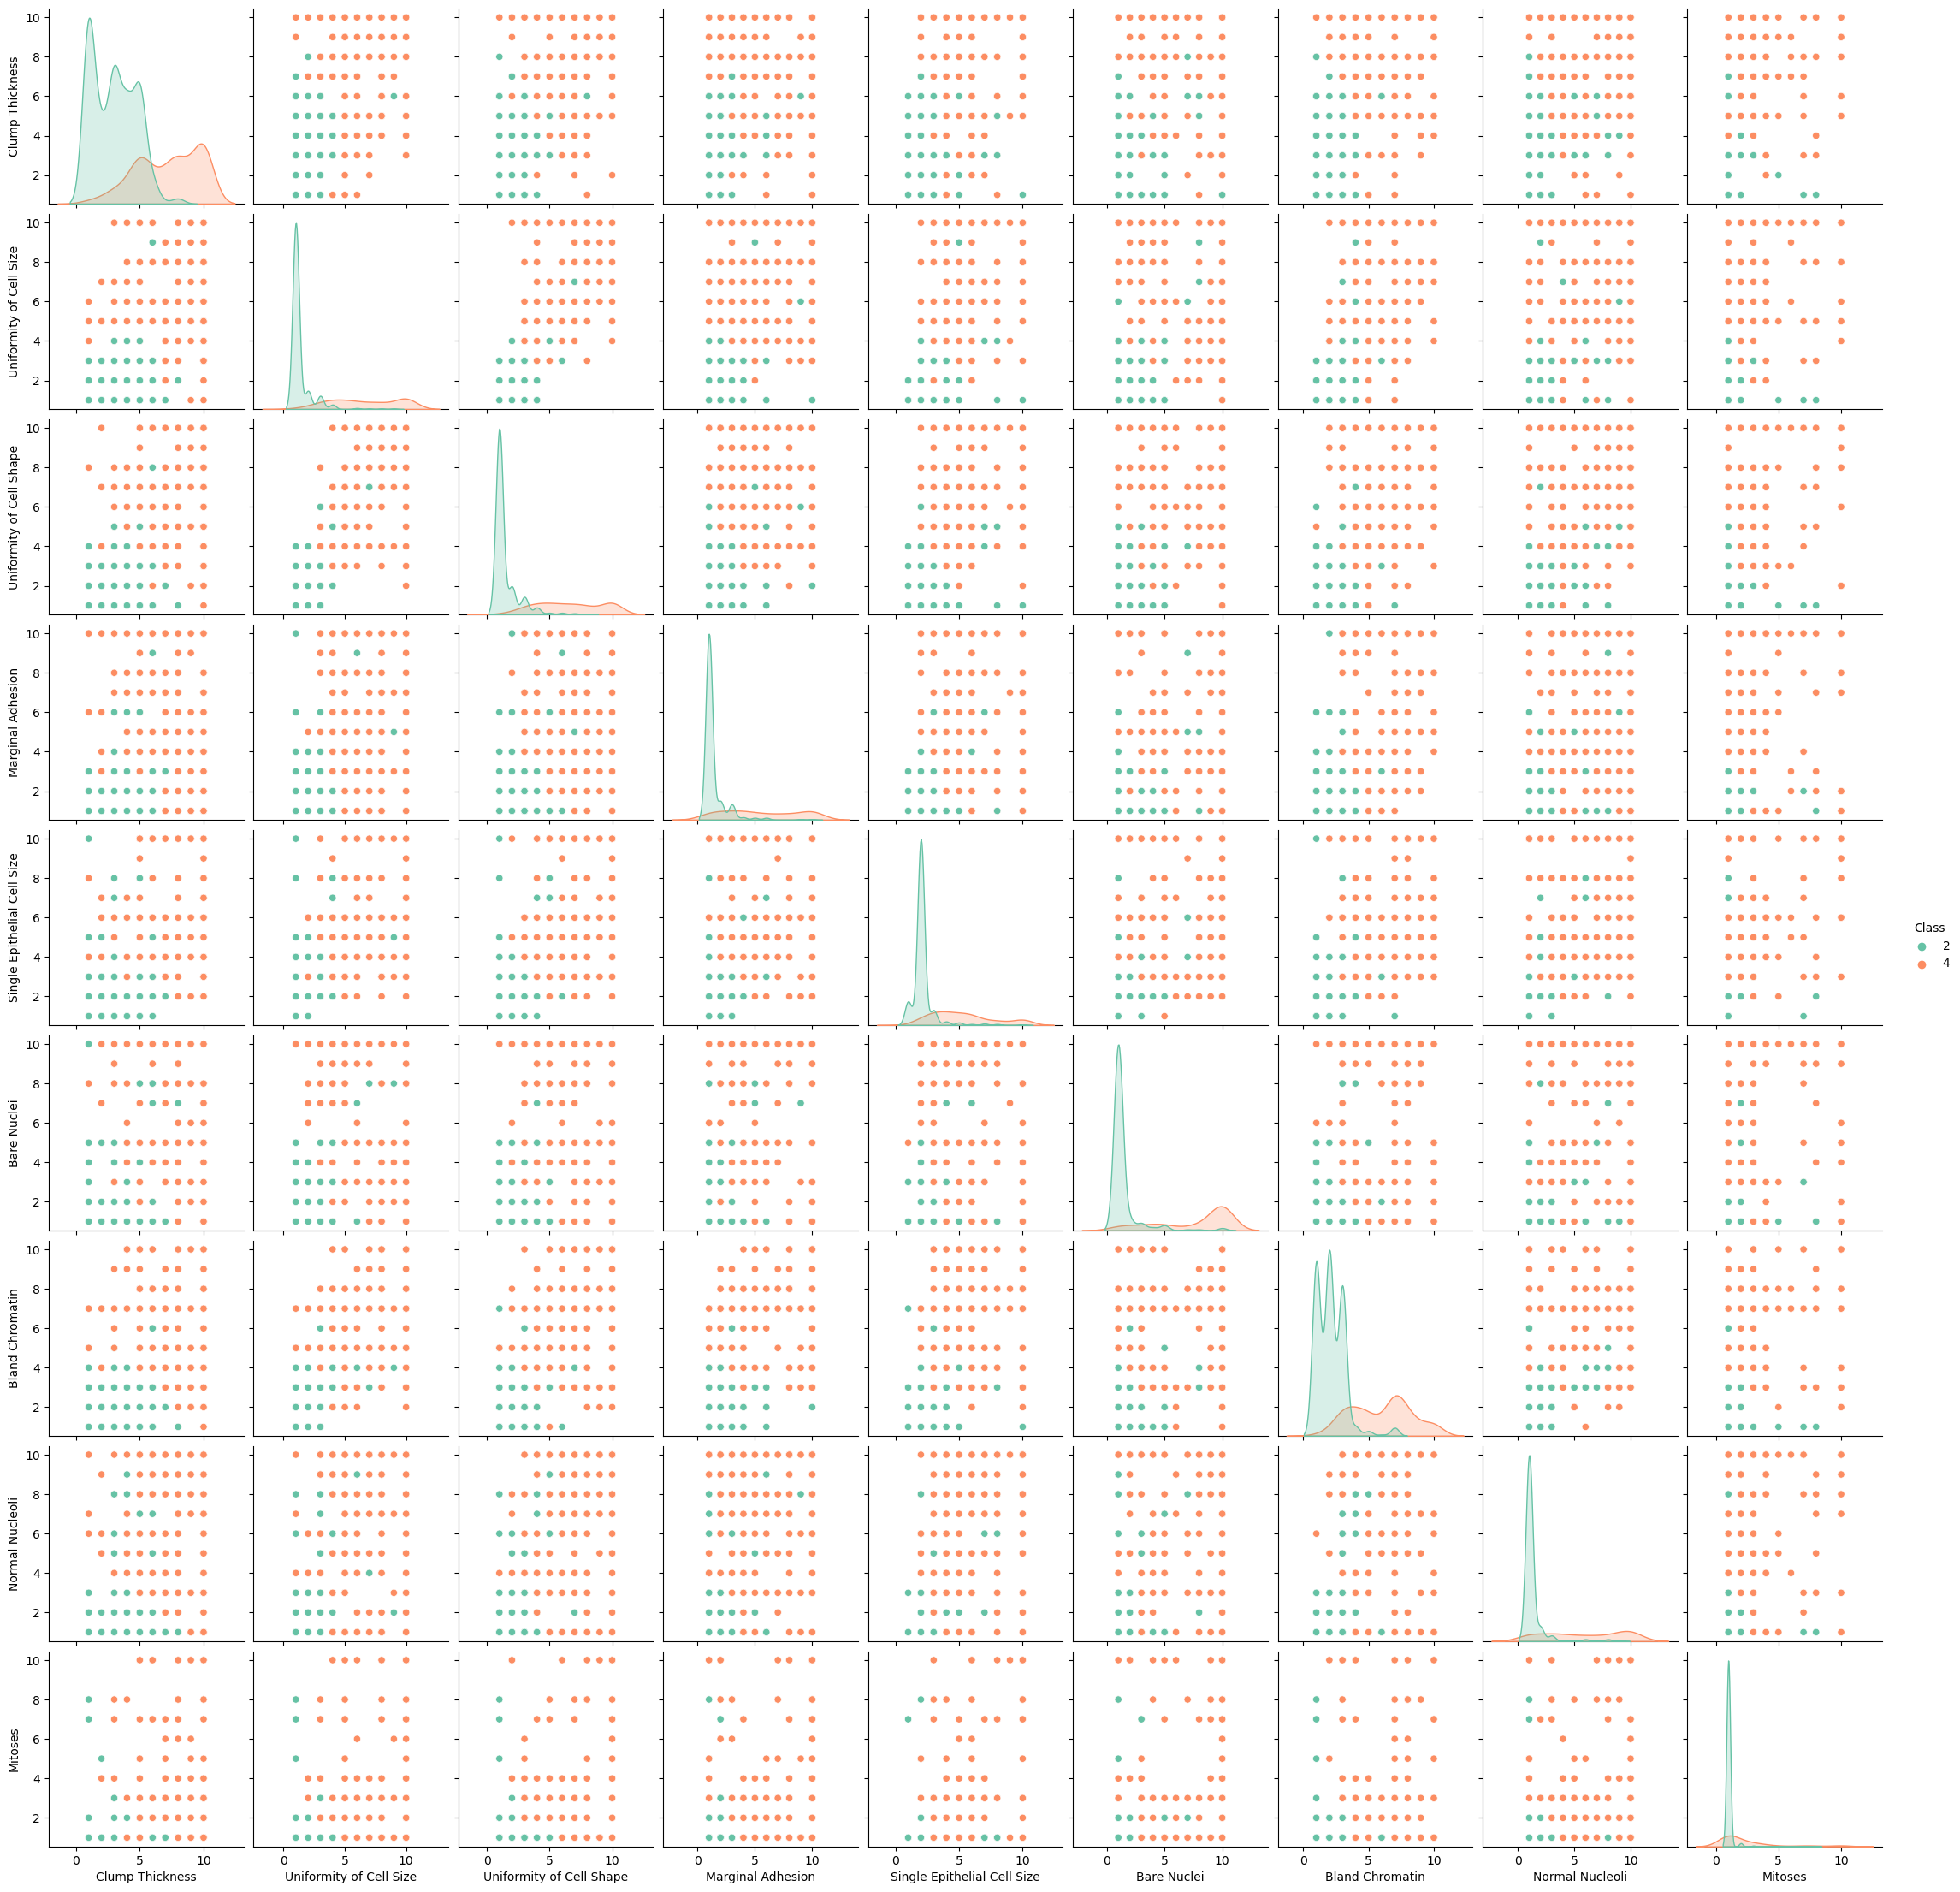

In [11]:
# Plotting a pairplot to get a visula distribution and relationship with the features and target variable
sns.pairplot(df, hue='Class', palette='Set2') 
# the target varaible cannot be 100% linearly seperated as seen in the plot

In [12]:
# Understanding the relationship between the features and targets
df.corr() 
# From the corr table, it is clear that we have 2 variables which are highly correlated with each other and that all features are positively correlated with the target class

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.583571,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.681309,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.701137,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.663669,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.579340,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.583571,0.681309,0.701137,0.663669,0.579340,1.000000,0.671398,0.571895,0.337078,0.807394
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.671398,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.571895,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.337078,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.807394,0.756616,0.712244,0.423170,1.000000


Text(0.5, 1.0, 'Features Heatmap')

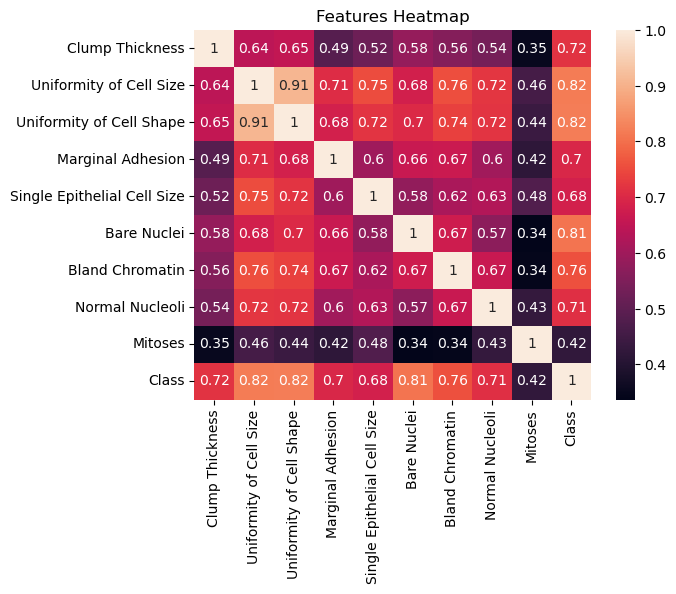

In [13]:
# Visualizing the Correlation
sns.heatmap(df.corr(), annot=True)
plt.title('Features Heatmap')

## Data Prepocessing 
Based on the insights obtained, Preprocessing steps will be applied to the data to prepare and make it suitable for the Models

In [14]:
# Dimension Reduction on the basis of multicollinear 
# We have two highly correlated columns with correlation coefficient of 0.91 and same correlation coefficient on the target varaible,hence and we will be dropping one of them

multicollinear_features = ['Uniformity of Cell Size','Uniformity of Cell Shape']

# Dropping the Uniformity_of_cell_size column
df=df.drop('Uniformity of Cell Size', axis=1)
df.shape

(699, 9)

In [15]:
# Converting to binary format to a more suitable format for the models (0 for benign, 1 for malignant)
df['Class'] = df['Class'].replace({2:0, 4:1})
df['Class'].value_counts()

0    458
1    241
Name: Class, dtype: int64

In [16]:
# Splitting the  data back into dependent and Independent variables
X= df.drop('Class', axis=1)
y=df['Class']

In [17]:
# Handling Inblance data by oversampling
sm=over_sampling.SMOTE()
X_res,y_res=sm.fit_resample(X,y)
X_res.shape

(916, 8)

Text(0.5, 1.0, 'Target Class Distribution')

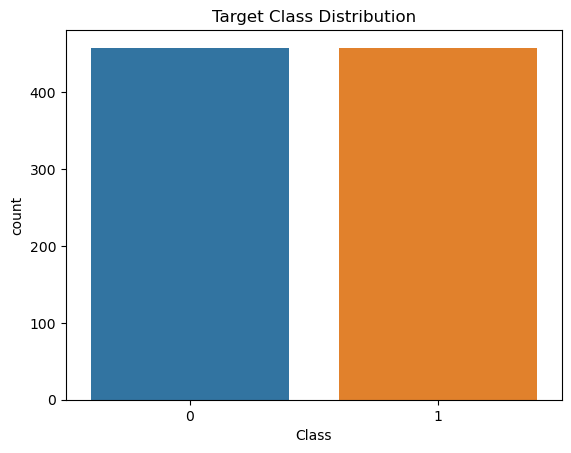

In [18]:
# Visualizing the distribution of the target variable after applying sampling
sns.countplot(x=y_res)
plt.title('Target Class Distribution')

In [19]:
# Splitting our data into train and test data

X_train, X_test, y_train, y_test=train_test_split(X_res, y_res, test_size=0.25, stratify=y_res, random_state=101)
X

,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,2,1.0,3,1,1
1,5,4,5,7,10.0,3,2,1
2,3,1,1,2,2.0,3,1,1
3,6,8,1,3,4.0,3,7,1
4,4,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...
694,3,1,1,3,2.0,1,1,1
695,2,1,1,2,1.0,1,1,1
696,5,10,3,7,3.0,8,10,2
697,4,6,4,3,4.0,10,6,1


### Feature importance selection for the models of study using Recursive Feature Elimination


In [20]:
# Declaring and instantiating the Models

svm_model = SVC(kernel='linear')
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

# Apply RFE (Recursive Feature Elimination) on each model to access future importance selection for each model
rfe_svm =RFE(estimator=svm_model, n_features_to_select=3) # Apply to the Support Vector Model
rfe_svm.fit(X_train,y_train)

rfe_dt =RFE(estimator=dt_model, n_features_to_select=3)
rfe_dt.fit(X_train,y_train) # Applying to the Decision Tree  Model

rfe_rf =RFE(estimator=rf_model, n_features_to_select=3)
rfe_rf.fit(X_train,y_train) # Applying to the Random Forest Model

RFE(estimator=RandomForestClassifier(), n_features_to_select=3)

In [21]:
# Comparing selected features of each model

selected_feature_svm = X_train.iloc[:,rfe_svm.support_] # Support Vector Feature Importance Selection
selected_feature_dt = X_train.iloc[:,rfe_dt.support_] # Decision Tree Feature Importance Selection
selected_feature_rf = X_train.iloc[:,rfe_rf.support_] # Decision F Feature Importance Selection

In [22]:
# Showing the Selected Feature Importance by SVM Model
selected_feature_svm.head()

,Clump Thickness,Uniformity of Cell Shape,Bland Chromatin
722,8,10,8
660,1,1,2
444,5,1,2
618,4,1,2
74,10,4,3


In [23]:
# Selected Feature Importance by Decision Tree Model
selected_feature_dt.head()

,Uniformity of Cell Shape,Single Epithelial Cell Size,Bare Nuclei
722,10,5,10.0
660,1,2,1.0
444,1,3,1.0
618,1,2,1.0
74,4,3,4.0


In [24]:
# Selected Feature Importance by Random Forest Model
selected_feature_rf.head()

,Uniformity of Cell Shape,Single Epithelial Cell Size,Bare Nuclei
722,10,5,10.0
660,1,2,1.0
444,1,3,1.0
618,1,2,1.0
74,4,3,4.0


### APPLYING THE MODEL TO THE DATASETS AND EVALUATING PERFORMANCE USING CROSS VALIDATION AND THE ROC AUC METRIC

In [25]:
# Creating lists to store models, their cross-validation results, and their names
models = []
results = []
names = []

# Appending various classifiers  to the models list
models.append(('SVM', SVC()))  # Adding a Support Vector Machine Classifier
models.append(('Decision Tree', DecisionTreeClassifier()))  # Adding a Decision Tree Classifier
models.append(('Random Forest', RandomForestClassifier()))  # Adding a Random Forest Classifier

# Looping over each model
for name, model in models:
    # Creating K-Fold cross-validator with 10 splits
    kf = KFold(n_splits=7, shuffle=True, random_state=101)

    # Perform cross-validation with scoring set as  ROC-AUC score
    cv_result = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc')

    # Append the cross-validation results and the model name to the list created earlier
    results.append(cv_result)
    names.append(name)

    # Print the mean and standard deviation of the cross-validation scores for each model
    print(f'{name}: {cv_result.mean()}, {cv_result.std()}')


SVM: 0.9836222734248183, 0.01395450282609128
Decision Tree: 0.9450921435491574, 0.019742544617584356
Random Forest: 0.9921390681296341, 0.006342169815887332


Text(0.5, 1.0, 'Performance Comparison of Different Models')

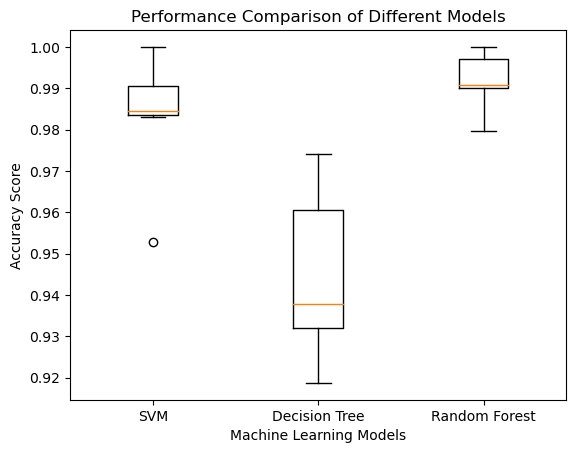

In [26]:
# Creating a Box Plot of Model Performance
plt.boxplot(results, labels=names)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy Score')
plt.title('Performance Comparison of Different Models')


### Model Generalization on Test Data

In [27]:
# Creating an empty list to store the result
test_result=[]
test_name=[]

# Looping the the models to calculate performance result
for name_test, model_test in models:
    # Fitting the model to the training data
    model_test.fit(X_train, y_train)

    # Making predictions on the test data
    prediction = model_test.predict(X_test)

    # Calculating the ROC AUC score using the true labels and the model's predictions
    test_scores = metrics.roc_auc_score(y_test, prediction)

    # appending the result and names to a list
    test_result.append(test_scores)
    test_name.append(name_test)



    # Printing the model name and its ROC AUC score
    print(f'{name_test}: {test_scores}')

SVM: 0.9737604881769641
Decision Tree: 0.9694126620900078
Random Forest: 0.9824942791762015


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Comparison of Model ROC AUC Scores on Test Data')

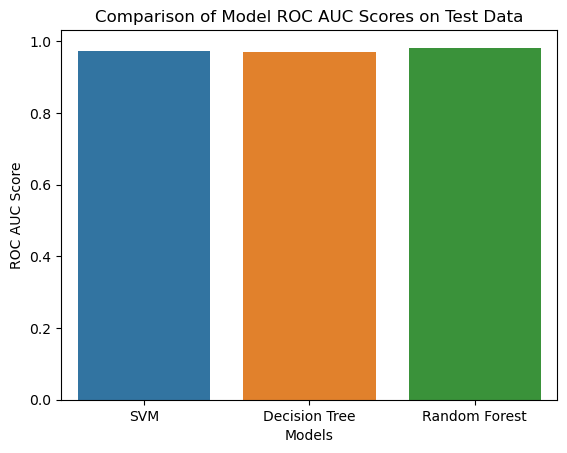

In [29]:
# Visualizing the performance result

sns.barplot(test_name,test_result)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('ROC AUC Score')
plt.title('Comparison of Model ROC AUC Scores on Test Data')